# Multi-class Classification: CNN for Sign Language Images

![](http://www.afrikareporter.com/wp-content/uploads/2015/08/cms-Sign-Language.png)

### 手順
1. Preprocess Data
2. Build and Compile A Model
3. Reshape Features and Encoded Target Data
4. Fit Training and Validation Data to Model
5. Evaluate Model
6. Prediction

## 1. Load the dataset

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [42]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [43]:
train.shape

(27455, 785)

In [44]:
test.shape

(7172, 785)

In [45]:
train["label"].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [46]:
len(train["label"].unique())

24

In [47]:
sorted(train["label"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

NOTE: 
- 24つクラスがある（隠れ層に）
- 784次元ベクトルの特徴量
- 画像のピクセルは28×28

### EDA

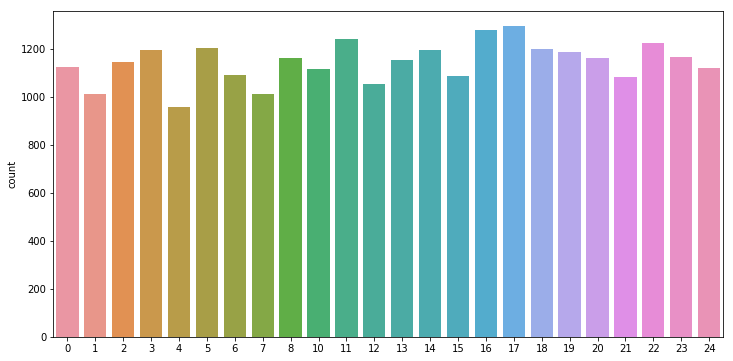

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(x =labels)

In [48]:
train_T = train["label"]
train_T.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [49]:
train.drop("label", axis=1, inplace=True)

In [50]:
classes = len(train_T.unique())
classes

24

In [ ]:
test_T = train["label"]
test.drop("label", axis=1, inplace=True)

# 2. CNN: Build and Compile A Model

In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [52]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=classes, activation="softmax"))

In [53]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

## 3. Reshape Data
- Featurs: DataFrame -> ndarray -> Reshape 4D
- Target: to_categorical -> Reshape 2D

In [54]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
train_labels = label_binrizer.fit_transform(train_T)

In [55]:
train_labels.shape

(27455, 24)

In [62]:
test_labels = label_binrizer.fit_transform(test_T)

In [63]:
test_labels.shape

(7172, 24)

In [58]:
type(test_labels)

numpy.ndarray

In [64]:
x_train = train.values.reshape(27455,28,28,1)
y_train = train_labels.reshape(27455, classes)
x_test = test.values.reshape(7172,28,28,1)
y_test = test_labels.reshape(7172, classes)

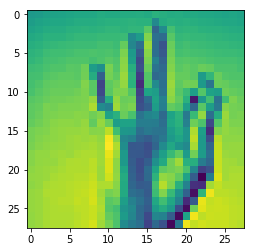

In [67]:
plt.imshow(x_test[1].reshape(28,28))

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

## 4. Fit Training and Validation Data to Model

In [68]:
BATCH_SIZE = 128
EPOCHS = 50

In [69]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 22s 998us/step - loss: 3.2899 - acc: 0.1082 - val_loss: 2.7477 - val_acc: 0.1677
Epoch 2/50
21964/21964 [==============================] - 22s 1ms/step - loss: 2.3434 - acc: 0.2371 - val_loss: 2.0156 - val_acc: 0.3262
Epoch 3/50
21964/21964 [==============================] - 21s 964us/step - loss: 1.6711 - acc: 0.4044 - val_loss: 1.2695 - val_acc: 0.5544
Epoch 4/50
21964/21964 [==============================] - 24s 1ms/step - loss: 1.0340 - acc: 0.6339 - val_loss: 0.5313 - val_acc: 0.8286
Epoch 5/50
21964/21964 [==============================] - 20s 929us/step - loss: 0.4314 - acc: 0.8557 - val_loss: 0.2000 - val_acc: 0.9425
Epoch 6/50
21964/21964 [==============================] - 22s 983us/step - loss: 0.1929 - acc: 0.9405 - val_loss: 0.0798 - val_acc: 0.9803
Epoch 7/50
21964/21964 [==============================] - 22s 982us/step - loss: 0.0844 - acc: 0.9760 - val_loss: 0.0419 

### Visualize Learning Process

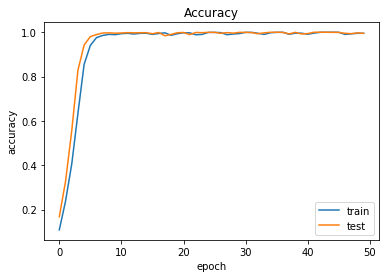

In [73]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "test"])
plt.show()

## 5. Evaluate Model

In [74]:
model.evaluate(x=x_test, y=y_test, verbose=1)

7172/7172 [==============================] - 3s 393us/step


[1.499986964367783, 0.8105131065253764]

- 損失値関数: 1.499986964367783
- 評価値: 0.8105131065253764

## 6. Predecting with test images

In [76]:
from sklearn.metrics import classification_report

In [90]:
x_test

array([[[[149],
         [149],
         [150],
         ...,
         [150],
         [150],
         [149]],

        [[150],
         [150],
         [150],
         ...,
         [151],
         [150],
         [151]],

        [[150],
         [151],
         [151],
         ...,
         [151],
         [151],
         [152]],

        ...,

        [[ 69],
         [ 69],
         [ 77],
         ...,
         [116],
         [113],
         [118]],

        [[ 74],
         [ 75],
         [ 76],
         ...,
         [110],
         [116],
         [113]],

        [[ 75],
         [ 74],
         [ 74],
         ...,
         [112],
         [120],
         [107]]],


       [[[126],
         [128],
         [131],
         ...,
         [133],
         [134],
         [132]],

        [[129],
         [132],
         [134],
         ...,
         [136],
         [136],
         [134]],

        [[133],
         [135],
         [138],
         ...,
         [140],
         [

In [92]:
y_pred = model.predict(x_test)

In [83]:
y_pred

array([[3.6635620e-16, 2.8389112e-14, 2.2425256e-12, ..., 1.0121256e-21,
        5.3831762e-22, 3.0473148e-19],
       [2.3897787e-23, 5.5112672e-05, 3.5015173e-24, ..., 3.3365980e-02,
        2.8143576e-21, 2.8579295e-18],
       [0.0000000e+00, 4.0706710e-24, 7.2155928e-33, ..., 2.9447358e-26,
        7.4778523e-19, 1.3920507e-19],
       ...,
       [2.7739713e-36, 1.5325371e-25, 9.9973708e-01, ..., 0.0000000e+00,
        1.9101558e-26, 3.3589314e-33],
       [4.9285117e-27, 1.4593779e-29, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.9510837e-30, 9.9998212e-01, ..., 0.0000000e+00,
        1.4802186e-31, 0.0000000e+00]], dtype=float32)

In [84]:
classification_report(y_test.round(), y_pred.round())

/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       331\n           1       1.00      0.90      0.95       432\n           2       0.93      0.91      0.92       310\n           3       0.67      0.74      0.70       245\n           4       0.91      0.90      0.90       498\n           5       0.83      0.91      0.87       247\n           6       0.71      0.62      0.66       348\n           7       0.75      0.85      0.79       436\n           8       0.85      0.93      0.89       288\n           9       0.88      0.73      0.80       331\n          10       0.90      0.86      0.88       209\n          11       0.73      0.65      0.69       394\n          12       0.76      0.80      0.78       291\n          13       0.89      0.76      0.82       246\n          14       0.83      0.87      0.85       347\n          15       0.95      1.00      0.98       164\n          16       0.49      0.60      0.54       144\n       